In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot

In [6]:
data = pd.read_csv('example_data\dummy_data_processed.csv')
data.head()

# split data into X features and y labels
X = np.array(data.drop(labels='Sales', axis=1))
y = np.array(data['Sales'])

# Split the data into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size=0.3)

In [7]:
# TODO: Implement ridge regression, NN regression, gradient tree boosting and gaussian regression

## **Ridge regression**

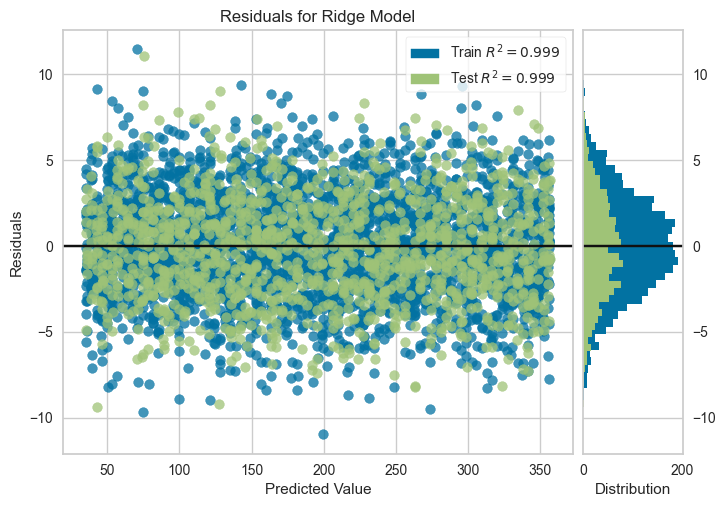

<AxesSubplot: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [35]:
from sklearn import linear_model

# create ridge regression model
reg = linear_model.Ridge(alpha=.5)

# fit model
reg.fit(data_train, target_train)
reg.score(data_test, target_test)

# visualize the model performance using yellowbrick
visualizer = ResidualsPlot(reg)
visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
plt.title
visualizer.show()   

## **Gradient tree boosting**